In [1]:
import os
import time
import glob
import pandas as pd
import numpy  as np
import tables as tb

%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm     as colormap

from mpl_toolkits               import mplot3d
from mpl_toolkits.mplot3d       import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# cities
from invisible_cities.cities.detsim      import detsim
from invisible_cities.cities.hypathia    import hypathia
from invisible_cities.cities.penthesilea import penthesilea
from invisible_cities.cities.esmeralda   import esmeralda
from invisible_cities.cities.beersheba   import beersheba

from invisible_cities.core.system_of_units import *

from invisible_cities.core.configure   import configure
from invisible_cities.core.configure   import all             as all_events

from invisible_cities.database import load_db

In [2]:
plt.rcParams["font.size"]      = 15
plt.rcParams["font.family"]    = "sans-serif"
plt.rcParams["font.monospace"] = "Computer Modern Sans Serif"

In [4]:
inputfilename = os.path.expandvars("$HOME/NEXT/DATA/processing/esmeralda/esmeralda_0_0nubb.h5")
config = pd.read_hdf(inputfilename, "MC/configuration").set_index("param_key")

# Beersheba

In [ ]:
# configure
conf = configure('beersheba $ICTDIR/invisible_cities/config/beersheba.conf'.split())

conf["files_in"]    = inputfilename
conf["file_out"]    = "/tmp/beersheba.h5"
conf["run_number"]  = 0
conf["detector_db"] = "next100"
conf["event_range"] = (4, 5)
conf["print_mod"]   = 1

conf["deconv_params"] = dict( q_cut         = 10
                            , drop_dist     = [16., 16.]
                            , psf_fname     = "$HOME/NEXT/DATA/LightTables/next100.kr83m_202103.psf.h5"
                            , e_cut         = 8e-3
                            , n_iterations  = 100
                            , iteration_tol = 1e-10
                            , sample_width  = [15.55, 15.55]
                            , bin_size      = [ 1.,  1.]
                            , energy_type   = "Ec"
                            , diffusion     = (1.0, 0.2)
                            , deconv_mode   = "joint"
                            , n_dim         = 2
                            , cut_type      = "abs"
                            , inter_method  = "cubic")

bconf = conf

t0 = time.time()
result = beersheba(**conf)
print("Exec (s)", time.time()-t0)

events processed: 0, event number: 0


In [9]:
DECO = pd.read_hdf(bconf["file_out"], "DECO/Events")

<IPython.core.display.Javascript object>


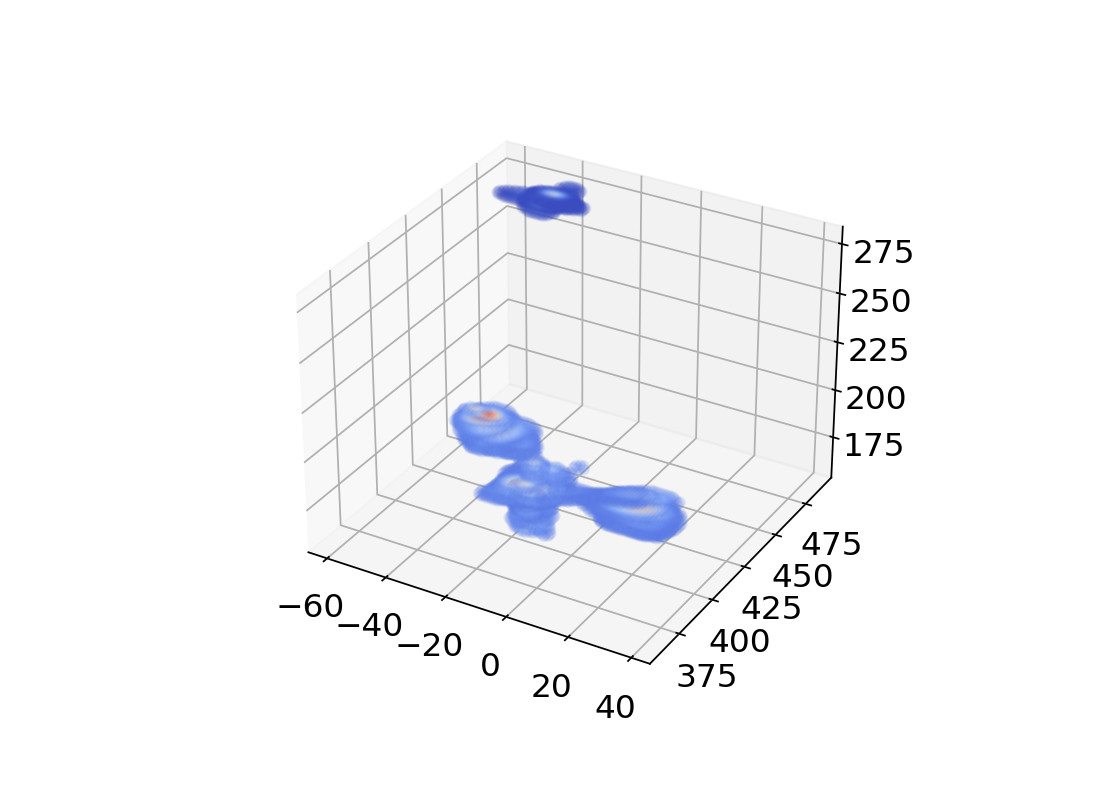

In [17]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(projection='3d')

norm   = colors  .Normalize(vmin=0, vmax=DECO["E"].max(), clip=True)
mapper = colormap.ScalarMappable(norm=norm, cmap=colormap.coolwarm)

ax.scatter(DECO["X"], DECO["Y"], DECO["Z"], color=mapper.to_rgba(DECO["E"]), alpha=0.1)

# mchits
# ax.scatter(mchits["x"], mchits["y"], mchits["z"], c="r", s=1)